In [1]:
# baseline model with dropout on the cifar10 dataset
import sys
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model
from sklearn.metrics import f1_score

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# run the test harness for evaluating a model
def run_test_harness(model):
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# fit model
	history = model.fit(trainX, trainY, epochs=50, batch_size=80, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	y_pred1 = np.argmax(model.predict(testX), axis=-1)

	# calculate F-1 score
	f1_score1 = f1_score(np.argmax(testY, axis=-1), y_pred1, average='weighted')
	print(f1_score1)


# entry point, run the test harness
model = define_model()
run_test_harness(model)

170498071/170498071 [==============================] - 4s 0us/step
> 79.370
313/313 [==============================] - 1s 2ms/step
0.7937987472977875


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
layer-1
1/1 [==============================] - 0s 52ms/step


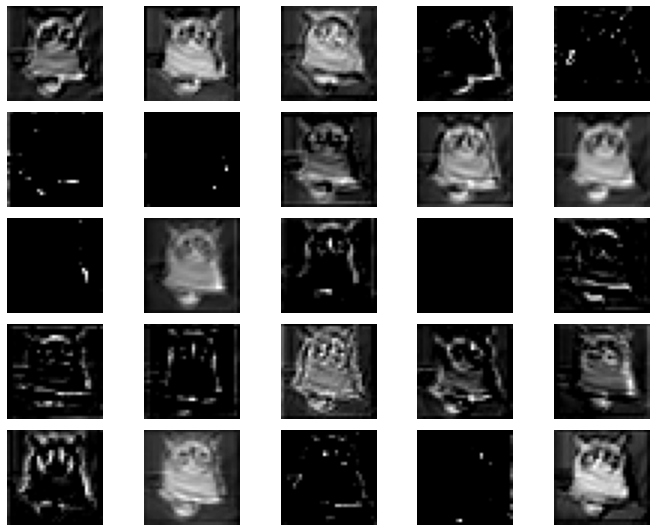

layer-5
1/1 [==============================] - 0s 76ms/step


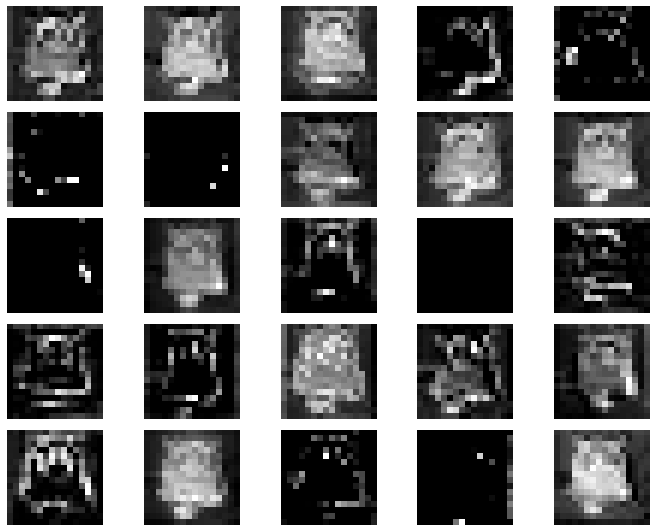

In [20]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.models import Model
import requests
from google.colab import drive
drive.mount('/content/gdrive')

class FeaturesExtraction:
    def __init__(self,model,layername):
        self.model = model
        self.layername = layername
        self.feature_model = Model(inputs=model.inputs, outputs=layername.output)
    
    def extract_features(self, img):
        return self.feature_model.predict(img)
    
def vis_feature_map(feature_maps):
    ncol = min(8,int(np.floor(np.sqrt(feature_maps.shape[3]))))
    fig, ax = plt.subplots(ncol, ncol,figsize=(2*ncol,ncol*1.5))
    if ncol == 1:
        ax.imshow(feature_maps[0,:,:,0],cmap="gray")
    else:
        count = 0
        for i in range(ncol):
            for j in range(ncol):
                ax[j,i].imshow(feature_maps[0,:,:,count],cmap="gray")
                ax[j,i].axis("off")
                count += 1
    plt.tight_layout()
    plt.show()

from PIL import Image, ImageOps
import numpy as np

def load_image(file_path):
    file_id = file_path.split('/')[-2]
    url = f'https://drive.google.com/uc?id={file_id}'
    img = Image.open(requests.get(url, stream=True).raw)
    # Convert the image to grayscale
    img = ImageOps.grayscale(img)
    # Resize the image while preserving aspect ratio
    img = ImageOps.fit(img, (32, 32), method=Image.ANTIALIAS)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Replicate the single channel to make it 3-channel
    img_array = np.repeat(img_array[:, :, np.newaxis], 3, axis=2)
    # Normalize the pixel values to be between 0 and 1
    img_array = img_array / 255.0
    # Add an extra dimension to represent the batch size of 1
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


model = define_model()
#print(model.layers[8])
fe = FeaturesExtraction(model, model.layers[1])

file_path = 'https://drive.google.com/file/d/1OxObkSLO6HZ2HPm2D-mtcgbef_kW76m5/view?usp=sharing'
img = load_image(file_path)
print('layer-1')
features = fe.extract_features(img)
vis_feature_map(features)


fe1 = FeaturesExtraction(model, model.layers[3])
print('layer-5')
features1 = fe1.extract_features(img)
vis_feature_map(features1)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


> 80.340
313/313 [==============================] - 1s 3ms/step
0.8014200249765828
model-1
layer-1
1/1 [==============================] - 0s 82ms/step


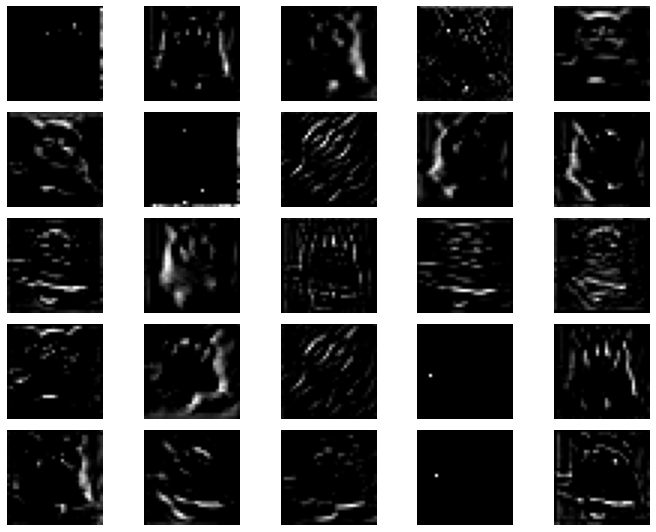

layer-5
1/1 [==============================] - 0s 118ms/step


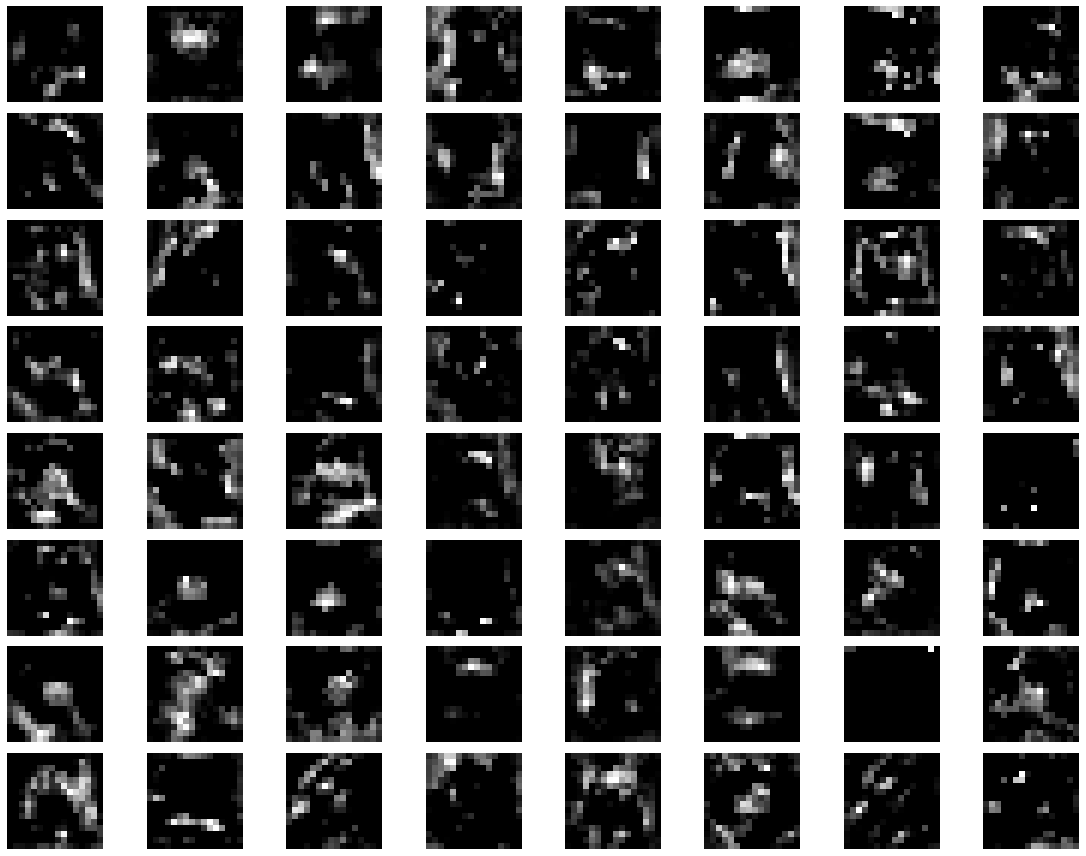

layer-8
1/1 [==============================] - 0s 73ms/step


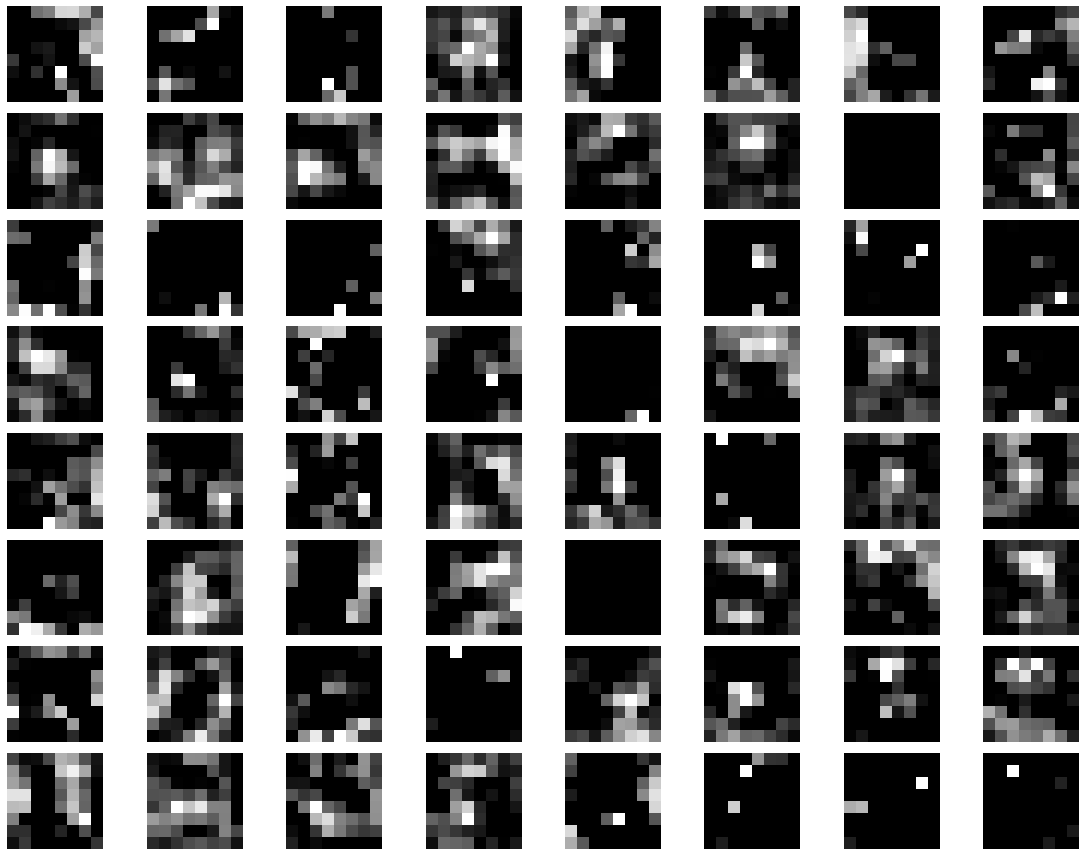

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


> 78.450


313/313 [==============================] - 1s 2ms/step
0.7833344059866779
model-2
layer-1
1/1 [==============================] - 0s 46ms/step


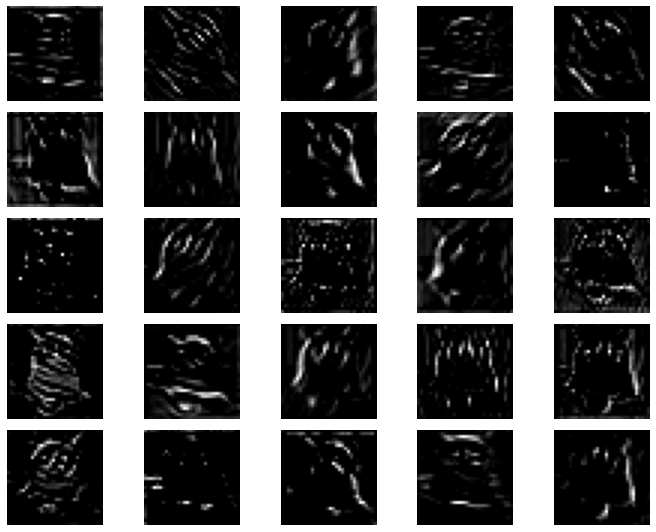

layer-5
1/1 [==============================] - 0s 61ms/step


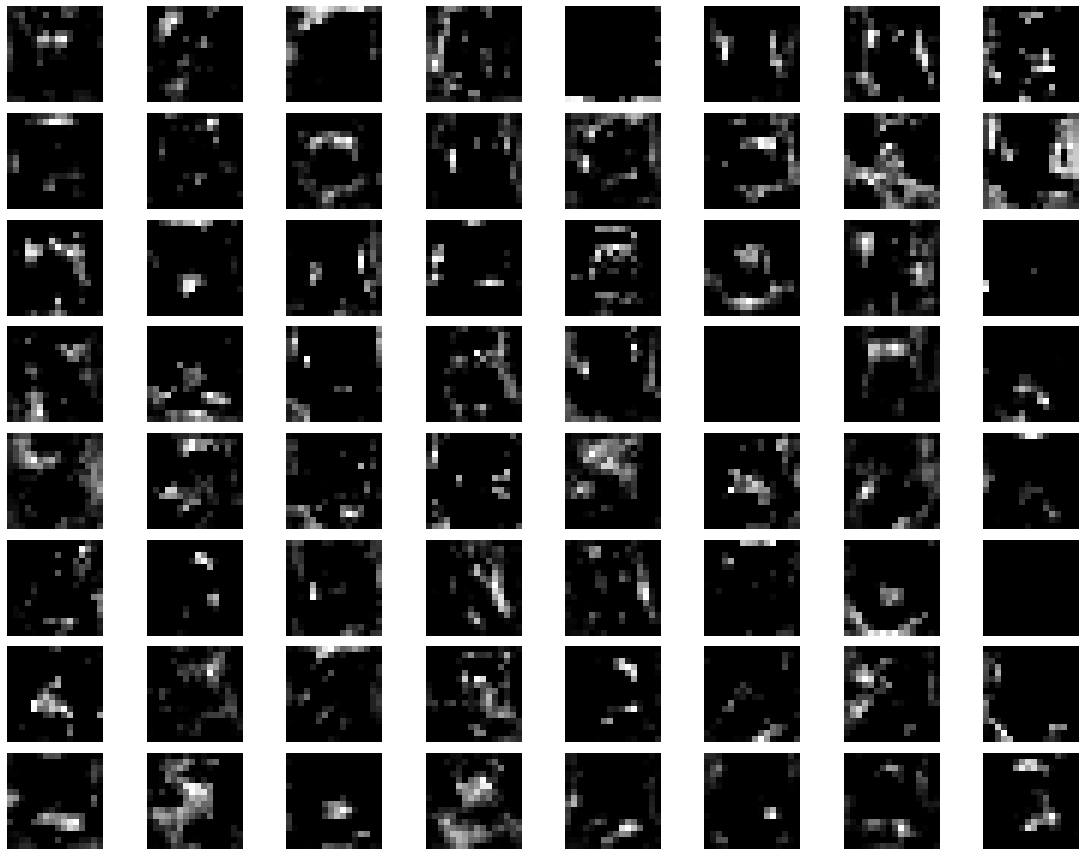

layer-8
1/1 [==============================] - 0s 78ms/step


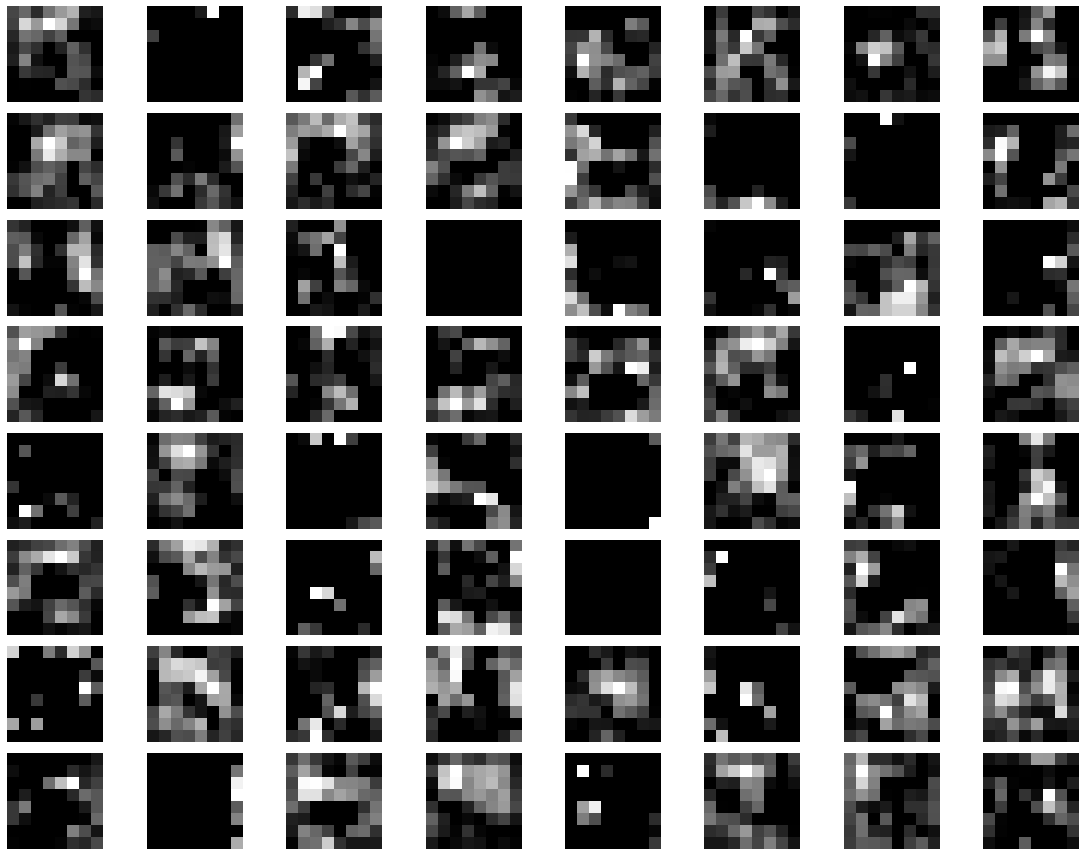

In [9]:
#a incresisng cnn layers with mlp constant
def define_model1():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
model1 = define_model1()
run_test_harness(model1)
print('model-1')
fe = FeaturesExtraction(model1, model1.layers[1])
print('layer-1')
features = fe.extract_features(img)
vis_feature_map(features)

fe = FeaturesExtraction(model1, model1.layers[5])
print('layer-5')
features = fe.extract_features(img)
vis_feature_map(features)

fe = FeaturesExtraction(model1, model1.layers[8])
print('layer-8')
features = fe.extract_features(img)
vis_feature_map(features)

#increasing mpl keeping cnn constant
def define_model2():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
model2 = define_model2()
run_test_harness(model2)
print('model-2')
fe = FeaturesExtraction(model2, model2.layers[1])
print('layer-1')
features = fe.extract_features(img)
vis_feature_map(features)

fe = FeaturesExtraction(model2, model2.layers[5])
print('layer-5')
features = fe.extract_features(img)
vis_feature_map(features)

fe = FeaturesExtraction(model2, model2.layers[8])
print('layer-8')
features = fe.extract_features(img)
vis_feature_map(features)


> 80.930
313/313 [==============================] - 1s 3ms/step
0.8075156208761247
layer-3
1/1 [==============================] - 0s 66ms/step


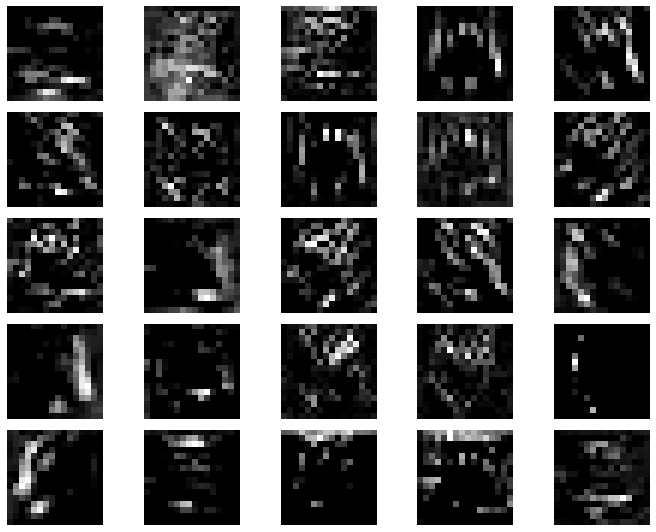

In [7]:
# b, increase size of convolution filter
def define_model3():
	model = Sequential()
	model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

model3 = define_model3()
run_test_harness(model3)

fe = FeaturesExtraction(model3, model3.layers[3])
print('layer-3')
features = fe.extract_features(img)
vis_feature_map(features)

> 72.980
313/313 [==============================] - 1s 3ms/step
0.7299340911541697
layer-3
1/1 [==============================] - 0s 103ms/step


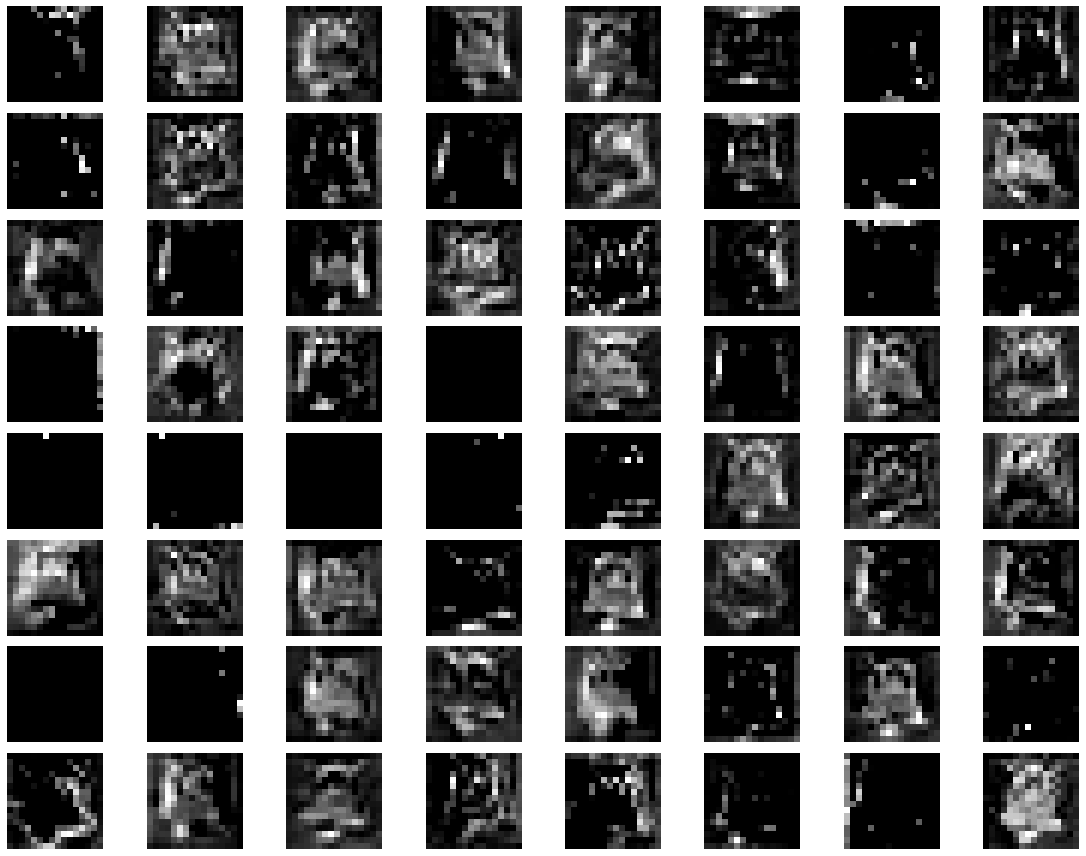

In [8]:
#c no dropout layers
def define_model4():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

model4 = define_model4()
run_test_harness(model4)

fe = FeaturesExtraction(model4, model4.layers[3])
print('layer-3')
features = fe.extract_features(img)
vis_feature_map(features)

In [11]:
import os

os.environ['KAGGLE_USERNAME'] = "sreyagarapati" # username from the json file
os.environ['KAGGLE_KEY'] = "7221c8ff0af75ec4ed953a5489595777" # key from the json file
! kaggle datasets download -d ifigotin/imagenetmini-1000

100% 3.91G/3.92G [00:30<00:00, 202MB/s]
100% 3.92G/3.92G [00:30<00:00, 136MB/s]


In [ ]:
!unzip imagenetmini-1000.zip

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential

batch_size = 32
img_height = 180
img_width = 180
data_dir = 'imagenet-mini/train'
data_dir2 = 'imagenet-mini/val'

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir2,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 34745 files belonging to 1000 classes.
Using 27796 files for training.
Found 3923 files belonging to 1000 classes.
Using 784 files for validation.
['n01440764', 'n01443537', 'n01484850', 'n01491361', 'n01494475', 'n01496331', 'n01498041', 'n01514668', 'n01514859', 'n01518878', 'n01530575', 'n01531178', 'n01532829', 'n01534433', 'n01537544', 'n01558993', 'n01560419', 'n01580077', 'n01582220', 'n01592084', 'n01601694', 'n01608432', 'n01614925', 'n01616318', 'n01622779', 'n01629819', 'n01630670', 'n01631663', 'n01632458', 'n01632777', 'n01641577', 'n01644373', 'n01644900', 'n01664065', 'n01665541', 'n01667114', 'n01667778', 'n01669191', 'n01675722', 'n01677366', 'n01682714', 'n01685808', 'n01687978', 'n01688243', 'n01689811', 'n01692333', 'n01693334', 'n01694178', 'n01695060', 'n01697457', 'n01698640', 'n01704323', 'n01728572', 'n01728920', 'n01729322', 'n01729977', 'n01734418', 'n01735189', 'n01737021', 'n01739381', 'n01740131', 'n01742172', 'n01744401', 'n01748264', 'n01749939', '

In [17]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
869/869 [==============================] - 98s 109ms/step - loss: 6.8155 - accuracy: 0.0046 - val_loss: 6.7073 - val_accuracy: 0.0038
Epoch 2/10
869/869 [==============================] - 77s 88ms/step - loss: 6.4314 - accuracy: 0.0120 - val_loss: 6.5242 - val_accuracy: 0.0115
Epoch 3/10
869/869 [==============================] - 71s 82ms/step - loss: 6.0154 - accuracy: 0.0232 - val_loss: 6.5737 - val_accuracy: 0.0128
Epoch 4/10
869/869 [==============================] - 73s 83ms/step - loss: 5.4863 - accuracy: 0.0545 - val_loss: 6.9914 - val_accuracy: 0.0153
Epoch 5/10
869/869 [==============================] - 71s 81ms/step - loss: 4.8448 - accuracy: 0.1138 - val_loss: 8.1947 - val_accuracy: 0.0140
Epoch 6/10
869/869 [==============================] - 75s 85ms/step - loss: 4.1864 - accuracy: 0.1919 - val_loss: 9.3668 - val_accuracy: 0.0166
Epoch 7/10
869/869 [==============================] - 74s 84ms/step - loss: 3.5611 - accuracy: 0.2794 - val_loss: 10.7643 - val_accurac

layer-3
1/1 [==============================] - 0s 245ms/step


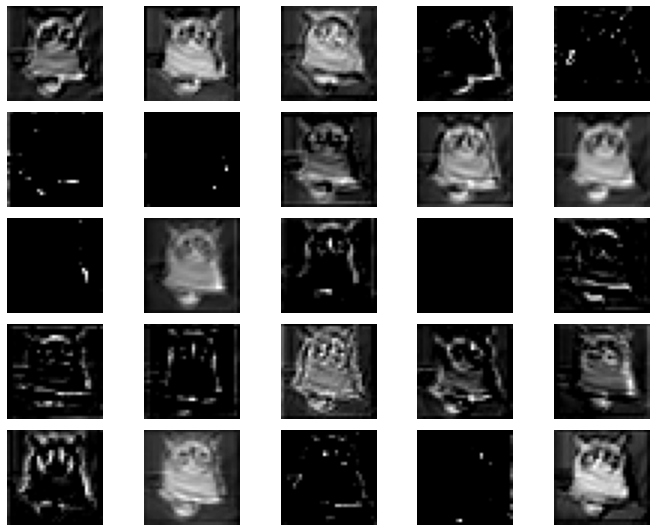

In [21]:
# Choose the layer to visualize the feature maps
layer_name = model.layers[1]

fe = FeaturesExtraction(model, model.layers[1])

file_path = 'https://drive.google.com/file/d/1Gwmo_OKTmmHzfGNe8EBlpipZe0o4CO_Z/view?usp=sharing'
img = load_image(file_path)
print('layer-3')
features = fe.extract_features(img)
vis_feature_map(features)